- Name: Manish  Bhima
- Date: 10/02/22

# What is Jupyter Notebook and used for?

The Jupyter Notebook is an open-source web application that allows data scientists to create and share documents that integrate live code, equations, computational output, visualizations, and other multimedia resources, along with explanatory text in a single document.

## Part 1: Everything in a cell

Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) The current  cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [1]:
7 * 8

56

**Command Mode**

- shift + enter run cell, select below
-ctrl + enter run cell
-option + enter run cell, insert -below
-A insert cell above
-B insert cell below
-C copy cell
-V paste cell
-D , D delete selected cell
-shift + M merge selected cells, or current cell with cell below if only one cell selected
-I , I interrupt kernel
-0 , 0 restart kernel (with dialog)
-Y change cell to code mode
-M change cell to markdown mode (good for documentation)

## Part 2: Working with code

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

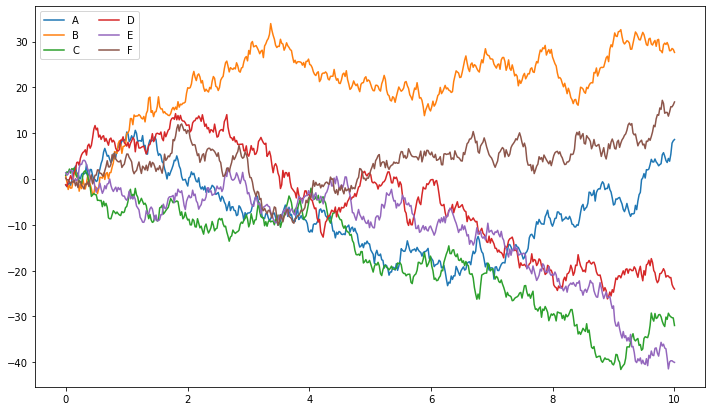

In [7]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

## Part 3: Interacting with data

In [6]:
import requests
import pandas as pd

In [8]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [9]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 19:12:47.162573')

In [10]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)


In [11]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


# Bitcoin:

In [12]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 20:00:00,18937,18992,18870,18917,39.709793,7.518788e+05
2022-09-25 21:00:00,18924,18954,18890,18908,30.975891,5.860475e+05
2022-09-25 22:00:00,18901,18934,18725,18746,124.999776,2.349634e+06
2022-09-25 23:00:00,18742,18902,18636,18792,187.846590,3.522637e+06
2022-09-26 00:00:00,18781,18841,18739,18810,55.138476,1.036345e+06


<AxesSubplot:xlabel='CloseTime'>

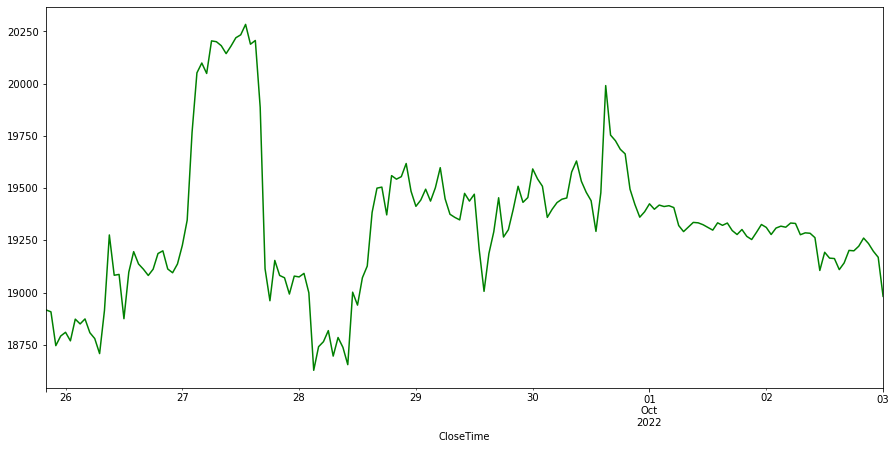

In [17]:
btc['ClosePrice'].plot(figsize=(15,7) ,color='green')

# Ether

In [18]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 20:00:00,1296.7,1303.4,1295.0,1300.0,475.893164,6.181069e+05
2022-09-25 21:00:00,1299.7,1299.9,1291.7,1292.9,1066.163968,1.381914e+06
2022-09-25 22:00:00,1292.6,1294.0,1280.6,1285.0,502.447814,6.466311e+05
2022-09-25 23:00:00,1285.6,1302.9,1270.0,1291.0,1523.950140,1.965608e+06
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06


<AxesSubplot:xlabel='CloseTime'>

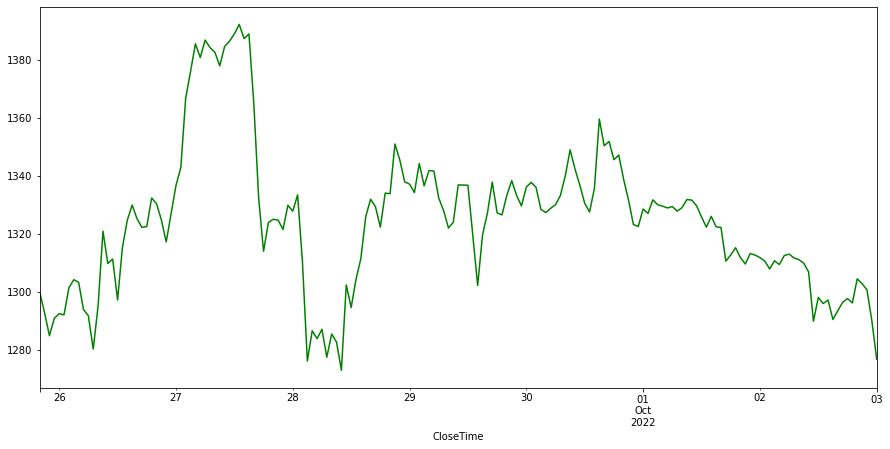

In [19]:
eth['ClosePrice'].plot(figsize=(15, 7),color='green')


In [20]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 20:00:00,1296.7,1303.4,1295.0,1300.0,475.893164,6.181069e+05
2022-09-25 21:00:00,1299.7,1299.9,1291.7,1292.9,1066.163968,1.381914e+06
2022-09-25 22:00:00,1292.6,1294.0,1280.6,1285.0,502.447814,6.466311e+05
2022-09-25 23:00:00,1285.6,1302.9,1270.0,1291.0,1523.950140,1.965608e+06
2022-09-26 00:00:00,1290.7,1300.0,1288.7,1292.6,775.401655,1.003705e+06


## Bonus: Dynamic plots with Bokeh

In [21]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [22]:
output_notebook()

Loading BokehJS ...

In [23]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

## Part 4: Exporting to Excel

In [24]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [25]:
btc.to_excel(writer, sheet_name='Bitcoin')


In [26]:
eth.to_excel(writer, sheet_name='Ether')

In [27]:
writer.save()